In [1]:
from tensorflow.keras import layers
from keras.models import Model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
x_train =x_train.reshape(60000, 28*28, 1)
x_test = x_test.reshape(10000, 28*28,1)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [26]:
x_train =x_train.reshape(60000, 28*28, 1)
x_test = x_test.reshape(10000, 28*28,1)

In [20]:
# import numpy as np
# data = np.random.rand(50,100,1)
# y = np.zeros((50,10))
# p=0
# for i in range(50):
#     y[i][p]=1
#     p=(p+1)%10
# data.shape , y.shape

((50, 100, 1), (50, 10))

# I-0 inception with conv1D:

In [4]:
from tensorflow.keras import layers
from keras.models import Model
from tensorflow.keras.utils import plot_model

def _inception(input_layer):
    # layer1
    conv1_1 = layers.Conv1D(filters=32,kernel_size=1,padding='same',activation='relu')(input_layer)
    # layer2
    conv2_1 = layers.Conv1D(filters=32,kernel_size=1,padding='same',activation='relu')(input_layer)
    conv2_2 = layers.Conv1D(filters=32,kernel_size=3,padding='same',activation='relu')(conv2_1)
    # layer2
    conv3_1 = layers.Conv1D(filters=32,kernel_size=3,padding='same',activation='relu')(input_layer)
    conv3_2 = layers.Conv1D(filters=32,kernel_size=3,padding='same',activation='relu')(conv3_1)
    # layer3
    pool4_1 = layers.MaxPooling1D(3,strides=2,padding='same')(input_layer)
    conv4_2 = layers.Conv1D(filters=32,kernel_size=5,padding='same',activation='relu')(pool4_1)
    
    concat= layers.concatenate([conv1_1,conv2_2,conv3_2], axis=2)
    return concat
    
def _shortcut_layer(input_layer,output_layer):
    return layers.Add()([input_layer,output_layer])

# 1.Inception Conv1D without LSTM:

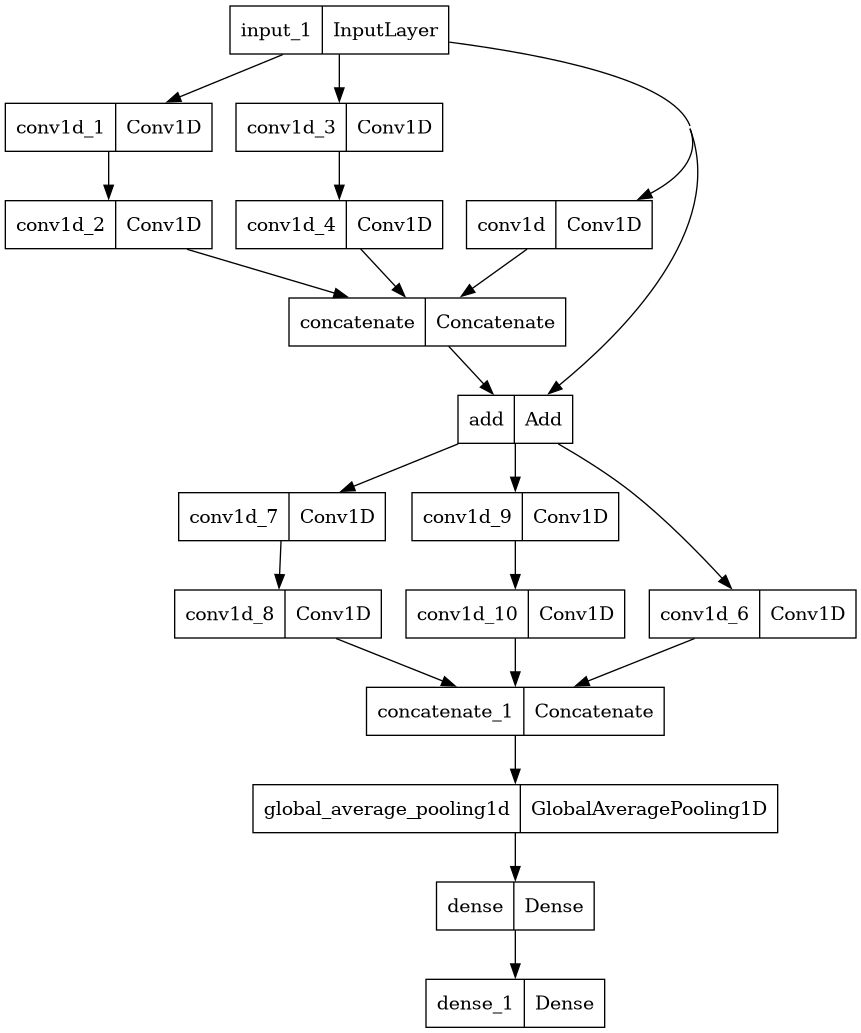

In [5]:
input_layer         = layers.Input(shape=(28*28,1))
inception1_block1   = _inception(input_layer)
shortcut_layer      = _shortcut_layer(inception1_block1,input_layer)
inception1_block2   = _inception(shortcut_layer)
global_averge_layer = layers.GlobalAveragePooling1D()(inception1_block2)
# lstm                = layers.LSTM(100,return_sequences=True)(inception1_block2)
fc1                 = layers.Dense(100,activation='relu')(global_averge_layer)
output_layer  = layers.Dense(10,activation='softmax')(fc1)

model = Model(inputs=input_layer,outputs=output_layer)
model.compile(optimizer='adam',loss="binary_crossentropy" ,metrics=["accuracy"])
plot_model(model)

In [8]:
history=model.fit(x_train,y_train,epochs=20,verbose=2)

Epoch 1/20
1875/1875 - 14s - loss: 0.2316 - accuracy: 0.4629 - 14s/epoch - 8ms/step
Epoch 2/20
1875/1875 - 14s - loss: 0.1967 - accuracy: 0.5625 - 14s/epoch - 7ms/step
Epoch 3/20
1875/1875 - 14s - loss: 0.1723 - accuracy: 0.6372 - 14s/epoch - 8ms/step
Epoch 4/20
1875/1875 - 14s - loss: 0.1564 - accuracy: 0.6792 - 14s/epoch - 8ms/step
Epoch 5/20
1875/1875 - 14s - loss: 0.1460 - accuracy: 0.7036 - 14s/epoch - 8ms/step
Epoch 6/20
1875/1875 - 14s - loss: 0.1397 - accuracy: 0.7196 - 14s/epoch - 8ms/step
Epoch 7/20
1875/1875 - 14s - loss: 0.1338 - accuracy: 0.7334 - 14s/epoch - 8ms/step
Epoch 8/20
1875/1875 - 14s - loss: 0.1280 - accuracy: 0.7458 - 14s/epoch - 8ms/step
Epoch 9/20
1875/1875 - 14s - loss: 0.1239 - accuracy: 0.7558 - 14s/epoch - 8ms/step
Epoch 10/20
1875/1875 - 14s - loss: 0.1198 - accuracy: 0.7668 - 14s/epoch - 8ms/step
Epoch 11/20
1875/1875 - 14s - loss: 0.1169 - accuracy: 0.7725 - 14s/epoch - 8ms/step
Epoch 12/20
1875/1875 - 14s - loss: 0.1133 - accuracy: 0.7811 - 14s/epoch 

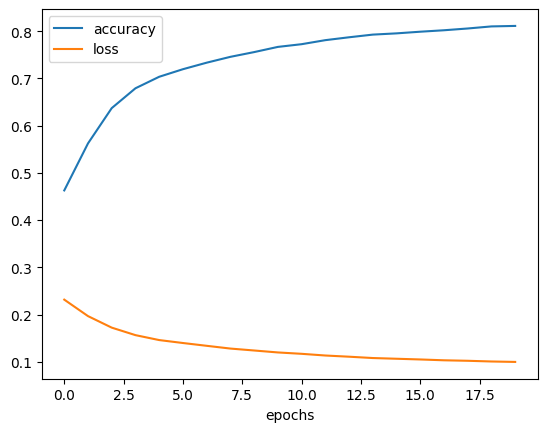

In [20]:
plt.plot(history.history['accuracy'],label="accuracy")
plt.plot(history.history['loss'],label="loss")
plt.xlabel("epochs")
plt.legend()

In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.1003 - accuracy: 0.8078


[0.1002848744392395, 0.8077999949455261]

# I-2.inception Conv1D with LSTM:

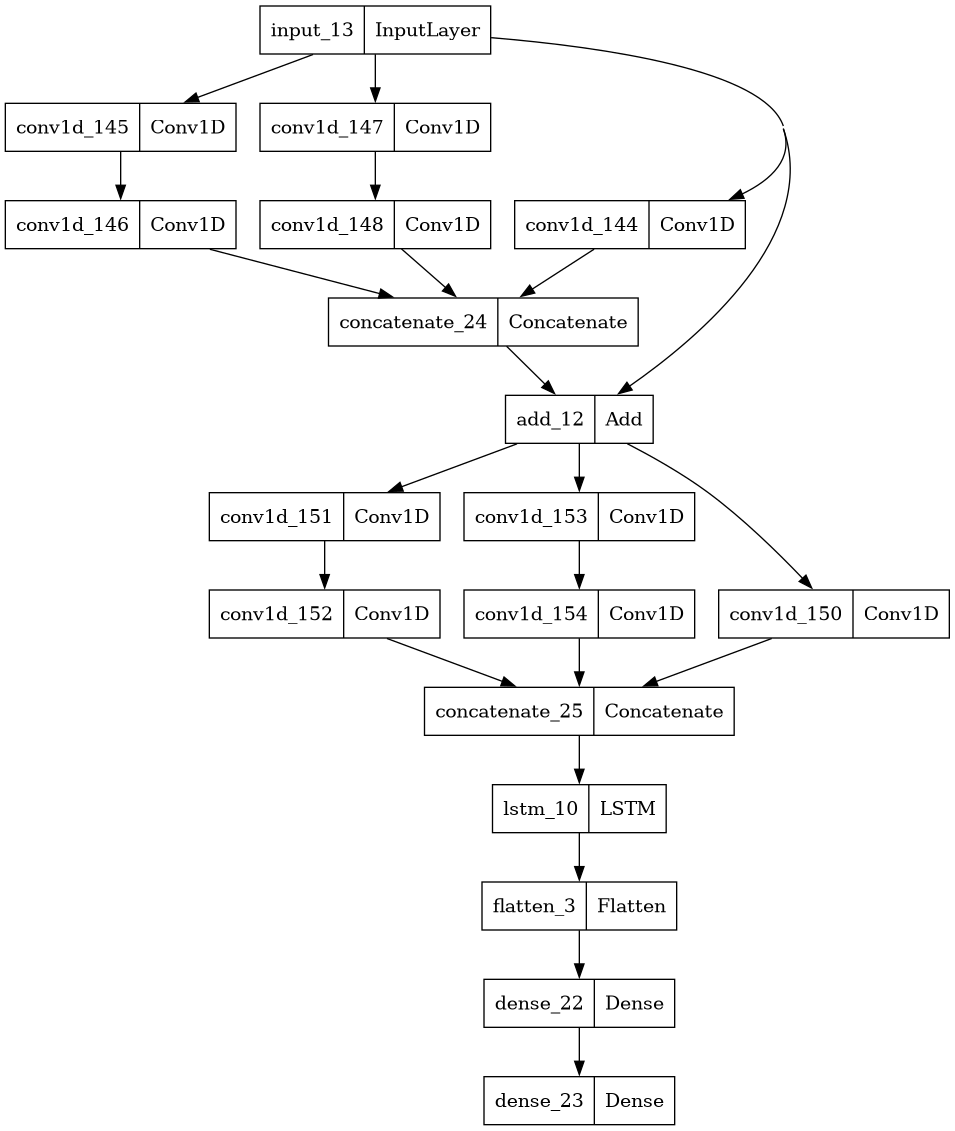

In [49]:
input_layer         = layers.Input(shape=(28*28,1))
inception1_block1   = _inception(input_layer)
shortcut_layer      = _shortcut_layer(inception1_block1,input_layer)
inception1_block2   = _inception(shortcut_layer)
# global_averge_layer = layers.GlobalAveragePooling1D()(inception1_block2)
lstm                = layers.LSTM(100,return_sequences=True)(inception1_block2)
flaten              = layers.Flatten()(lstm)
fc1                 = layers.Dense(100,activation='relu')(flaten)
output_layer  = layers.Dense(10,activation='softmax')(fc1)

model_lstm = Model(inputs=input_layer,outputs=output_layer)
model_lstm.compile(optimizer='adam',loss="binary_crossentropy" ,metrics=["accuracy"])
plot_model(model_lstm)

In [40]:
x_train.shape,y_train.shape

((60000, 784, 1), (60000, 10))

In [50]:
history_lstm=model_lstm.fit(x_train,y_train,epochs=10,verbose=2)

Epoch 1/10
1875/1875 - 63s - loss: 0.0392 - accuracy: 0.9437 - 63s/epoch - 34ms/step
Epoch 2/10
1875/1875 - 58s - loss: 0.0202 - accuracy: 0.9706 - 58s/epoch - 31ms/step
Epoch 3/10
1875/1875 - 58s - loss: 0.0160 - accuracy: 0.9775 - 58s/epoch - 31ms/step
Epoch 4/10
1875/1875 - 58s - loss: 0.0123 - accuracy: 0.9834 - 58s/epoch - 31ms/step
Epoch 5/10
1875/1875 - 58s - loss: 0.0095 - accuracy: 0.9876 - 58s/epoch - 31ms/step
Epoch 6/10
1875/1875 - 58s - loss: 0.0104 - accuracy: 0.9868 - 58s/epoch - 31ms/step
Epoch 7/10
1875/1875 - 58s - loss: 0.0066 - accuracy: 0.9917 - 58s/epoch - 31ms/step
Epoch 8/10
1875/1875 - 58s - loss: 0.0058 - accuracy: 0.9936 - 58s/epoch - 31ms/step
Epoch 9/10
1875/1875 - 58s - loss: 0.0059 - accuracy: 0.9932 - 58s/epoch - 31ms/step
Epoch 10/10
1875/1875 - 58s - loss: 0.0068 - accuracy: 0.9922 - 58s/epoch - 31ms/step


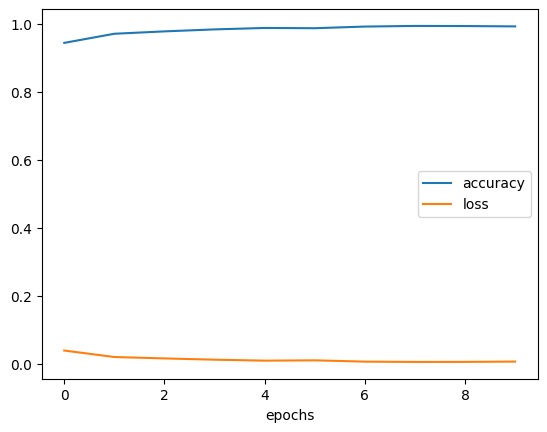

In [52]:
plt.plot(history_lstm.history['accuracy'],label="accuracy")
plt.plot(history_lstm.history['loss'],label="loss")
plt.xlabel("epochs")
plt.legend()

In [51]:
model_lstm.evaluate(x_test,y_test)

313/313 [==============================] - 5s 13ms/step - loss: 0.0310 - accuracy: 0.9711


[0.030998755246400833, 0.9710999727249146]

# I-3.inception Conv1D with BLSTM:

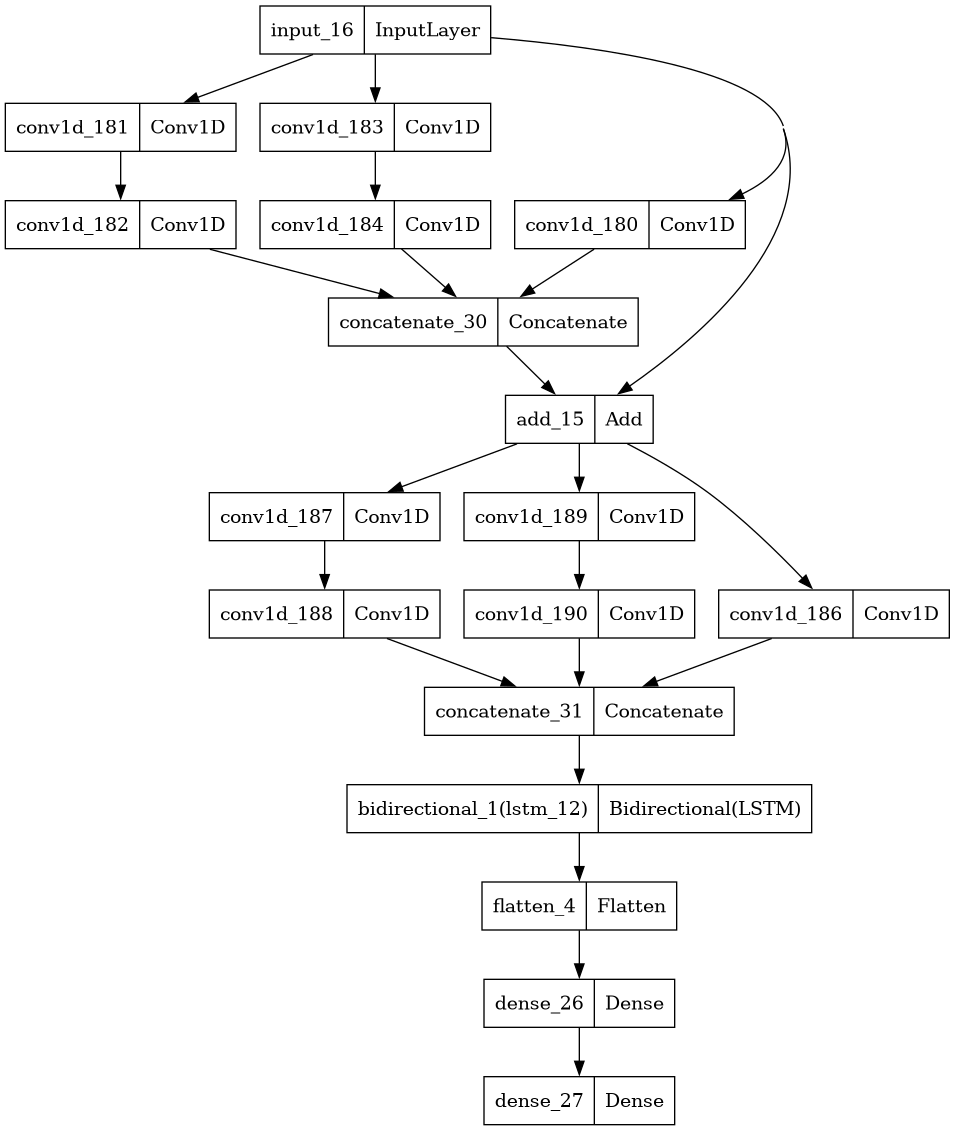

In [56]:
input_layer         = layers.Input(shape=(28*28,1))
inception1_block1   = _inception(input_layer)
shortcut_layer      = _shortcut_layer(inception1_block1,input_layer)
inception1_block2   = _inception(shortcut_layer)
# global_averge_layer = layers.GlobalAveragePooling1D()(inception1_block2)
blstm                = layers.Bidirectional(layers.LSTM(100,return_sequences=True))(inception1_block2)
flatten             = layers.Flatten()(blstm)
fc1                 = layers.Dense(100,activation='relu')(flatten)
output_layer  = layers.Dense(10,activation='softmax')(fc1)

model_blstm = Model(inputs=input_layer,outputs=output_layer)
model_blstm.compile(optimizer='adam',loss="binary_crossentropy" ,metrics=["accuracy"])
plot_model(model_blstm)

In [57]:
history_blstm=model_blstm.fit(x_train,y_train,epochs=10,verbose=2)

Epoch 1/10
1875/1875 - 153s - loss: 0.0382 - accuracy: 0.9467 - 153s/epoch - 82ms/step
Epoch 2/10
1875/1875 - 107s - loss: 0.0192 - accuracy: 0.9723 - 107s/epoch - 57ms/step
Epoch 3/10
1875/1875 - 107s - loss: 0.0159 - accuracy: 0.9784 - 107s/epoch - 57ms/step
Epoch 4/10
1875/1875 - 107s - loss: 0.0115 - accuracy: 0.9844 - 107s/epoch - 57ms/step
Epoch 5/10
1875/1875 - 107s - loss: 0.0142 - accuracy: 0.9815 - 107s/epoch - 57ms/step
Epoch 6/10
1875/1875 - 107s - loss: 0.0094 - accuracy: 0.9882 - 107s/epoch - 57ms/step
Epoch 7/10
1875/1875 - 107s - loss: 0.0120 - accuracy: 0.9853 - 107s/epoch - 57ms/step
Epoch 8/10
1875/1875 - 107s - loss: 0.0082 - accuracy: 0.9899 - 107s/epoch - 57ms/step
Epoch 9/10
1875/1875 - 107s - loss: 0.0075 - accuracy: 0.9912 - 107s/epoch - 57ms/step
Epoch 10/10
1875/1875 - 107s - loss: 0.0072 - accuracy: 0.9924 - 107s/epoch - 57ms/step


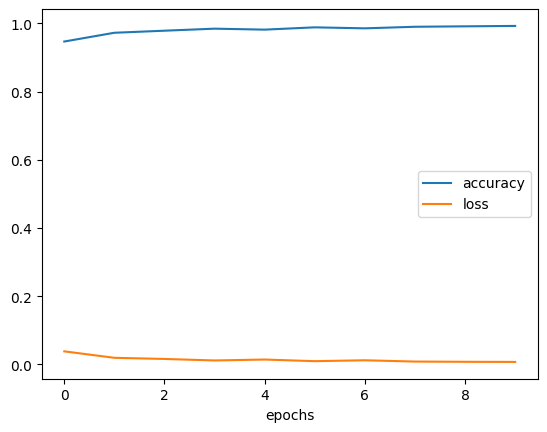

In [59]:
plt.plot(history_blstm.history['accuracy'],label="accuracy")
plt.plot(history_blstm.history['loss'],label="loss")
plt.xlabel("epochs")
plt.legend()

In [60]:
model_blstm.evaluate(x_test,y_test)

313/313 [==============================] - 8s 23ms/step - loss: 0.0355 - accuracy: 0.9658


[0.03552095964550972, 0.9657999873161316]

# II-0 inception with Conv2D:

In [61]:
from tensorflow.keras import layers
from keras.models import Model
from tensorflow.keras.utils import plot_model

def _inception(input_layer):
    # layer1
    conv1_1 = layers.Conv2D(filters=32,kernel_size=1,padding='same',activation='relu')(input_layer)
    # layer2
    conv2_1 = layers.Conv2D(filters=32,kernel_size=1,padding='same',activation='relu')(input_layer)
    conv2_2 = layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')(conv2_1)
    # layer2
    conv3_1 = layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')(input_layer)
    conv3_2 = layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')(conv3_1)
    # layer3
    pool4_1 = layers.MaxPooling2D(3,strides=2,padding='same')(input_layer)
    conv4_2 = layers.Conv2D(filters=32,kernel_size=5,padding='same',activation='relu')(pool4_1)
    
    concat= layers.concatenate([conv1_1,conv2_2,conv3_2], axis=3)
    return concat
    
def _shortcut_layer(input_layer,output_layer):
    return layers.Add()([input_layer,output_layer])

# II-1 inception with Conv2D without LSTM:

In [64]:
import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [65]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_train.shape

(60000, 10)

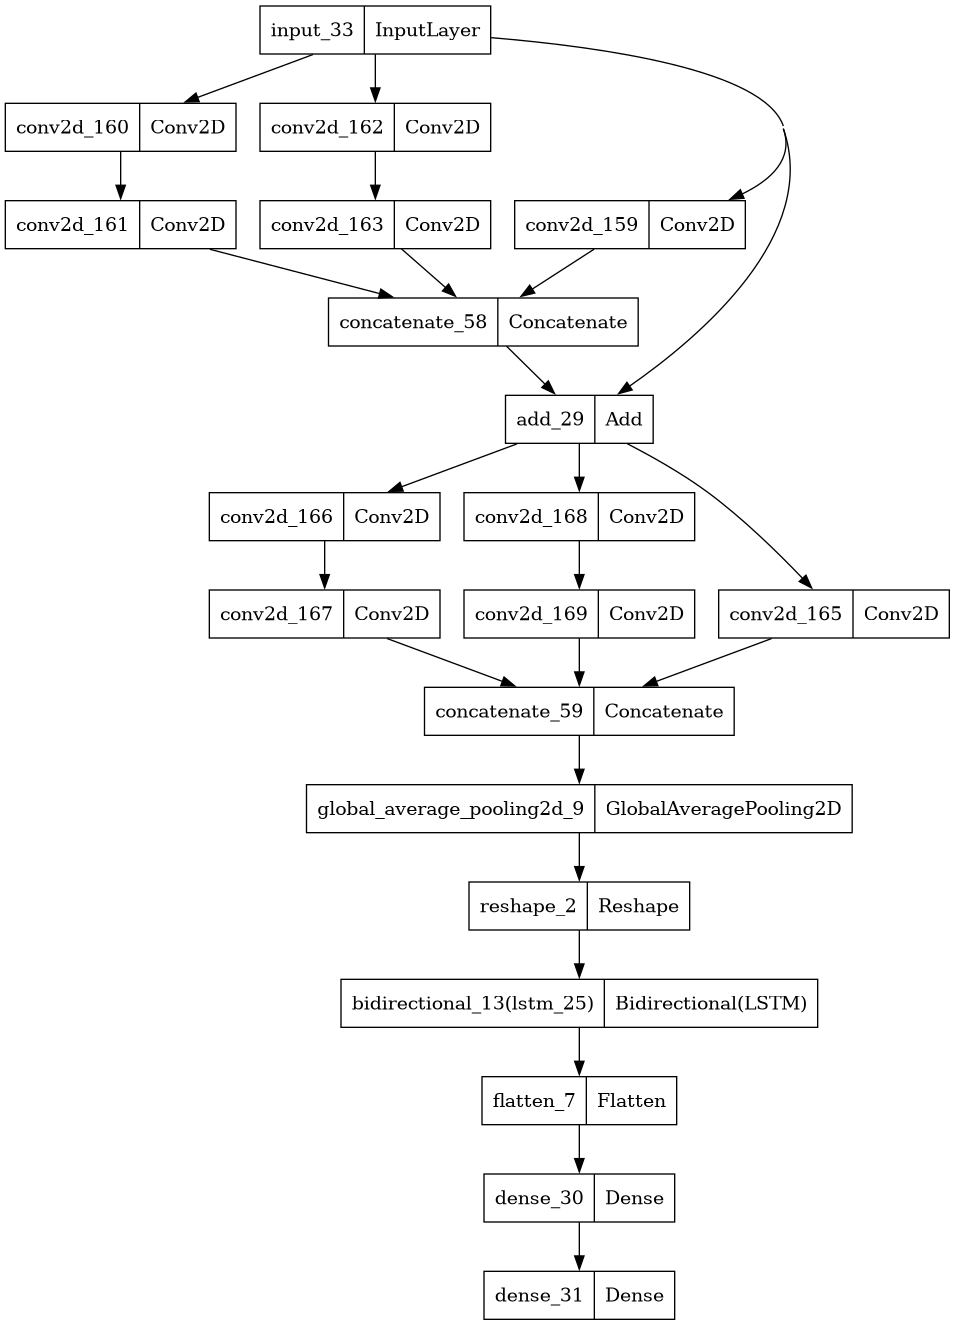

In [81]:
input_layer         = layers.Input(shape=(28,28,1))
inception1_block1   = _inception(input_layer)
shortcut_layer      = _shortcut_layer(inception1_block1,input_layer)
inception1_block2   = _inception(shortcut_layer)
global_averge_layer = layers.GlobalAveragePooling2D()(inception1_block2)
reshape             = layers.Reshape((-1,96))(global_averge_layer) #we found 96 after debugging.
blstm                = layers.Bidirectional(layers.LSTM(100,return_sequences=True))(reshape)
flatten             = layers.Flatten()(blstm)
fc1                 = layers.Dense(100,activation='relu')(flatten)
output_layer  = layers.Dense(10,activation='softmax')(fc1)

model_blstm2 = Model(inputs=input_layer,outputs=output_layer)
model_blstm2.compile(optimizer='adam',loss="binary_crossentropy" ,metrics=["accuracy"])
plot_model(model_blstm2)

In [82]:
history_blstm2=model_blstm2.fit(x_train,y_train,epochs=10,verbose=2)

Epoch 1/10
1875/1875 - 23s - loss: 0.1782 - accuracy: 0.5835 - 23s/epoch - 12ms/step
Epoch 2/10
1875/1875 - 16s - loss: 0.0322 - accuracy: 0.9493 - 16s/epoch - 8ms/step
Epoch 3/10
1875/1875 - 16s - loss: 0.0211 - accuracy: 0.9666 - 16s/epoch - 9ms/step
Epoch 4/10
1875/1875 - 16s - loss: 0.0166 - accuracy: 0.9725 - 16s/epoch - 9ms/step
Epoch 5/10
1875/1875 - 16s - loss: 0.0139 - accuracy: 0.9775 - 16s/epoch - 9ms/step
Epoch 6/10
1875/1875 - 16s - loss: 0.0123 - accuracy: 0.9799 - 16s/epoch - 8ms/step
Epoch 7/10
1875/1875 - 16s - loss: 0.0111 - accuracy: 0.9815 - 16s/epoch - 9ms/step
Epoch 8/10
1875/1875 - 16s - loss: 0.0100 - accuracy: 0.9838 - 16s/epoch - 9ms/step
Epoch 9/10
1875/1875 - 16s - loss: 0.0096 - accuracy: 0.9838 - 16s/epoch - 8ms/step
Epoch 10/10
1875/1875 - 16s - loss: 0.0088 - accuracy: 0.9857 - 16s/epoch - 9ms/step


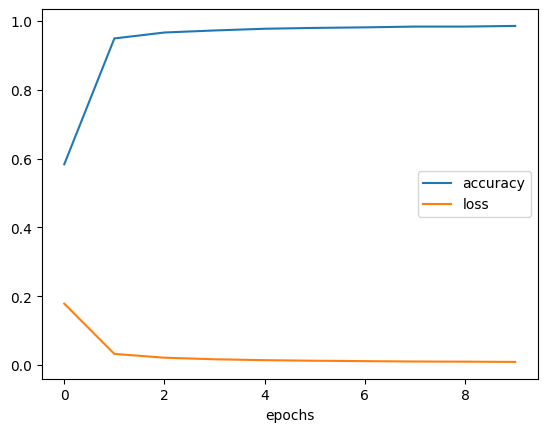

In [83]:
plt.plot(history_blstm2.history['accuracy'],label="accuracy")
plt.plot(history_blstm2.history['loss'],label="loss")
plt.xlabel("epochs")
plt.legend()

In [84]:
model_blstm2.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0123 - accuracy: 0.9790


[0.012296358123421669, 0.9789999723434448]